# Data Cleaning Pipeline

In [5]:
# Import Libraries
import pandas as pd
from helper_file import ROOT_PATH

Root Folder location: /workspaces/MultiClass_Pump_Prediction


In [2]:
# Edit Configuration 
print("Initial Output Rows:", pd.options.display.max_rows)
pd.options.display.max_rows = 60
print("Updated Output Rows:", pd.options.display.max_rows)

Initial Output Rows: 60
Updated Output Rows: 60


## Load Data

In [3]:
pump_data_val = pd.read_csv(f"{ROOT_PATH}/data/training_set_values.csv")
pump_data_lab = pd.read_csv(f"{ROOT_PATH}/data/training_set_labels.csv")

print("Pump Data Values Shape: \n")
print(pump_data_val.shape)

print("\nPump Data Labels Shape: \n")
print(pump_data_lab.shape)

Pump Data Values Shape: 

(59400, 40)

Pump Data Labels Shape: 

(59400, 2)


In [4]:
pump_data_val.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
pump_data_lab.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
print("Check class Imbalance: ")
print(pump_data_lab.status_group.value_counts())

Check class Imbalance: 
status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64


## Data Cleaning - First 20 Features

In [7]:
first_20_features = pump_data_val.iloc[:,:20]
first_20_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd


In [8]:
first_20_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              59400 non-null  int64  
 1   amount_tsh      59400 non-null  float64
 2   date_recorded   59400 non-null  object 
 3   funder          55763 non-null  object 
 4   gps_height      59400 non-null  int64  
 5   installer       55745 non-null  object 
 6   longitude       59400 non-null  float64
 7   latitude        59400 non-null  float64
 8   wpt_name        59398 non-null  object 
 9   num_private     59400 non-null  int64  
 10  basin           59400 non-null  object 
 11  subvillage      59029 non-null  object 
 12  region          59400 non-null  object 
 13  region_code     59400 non-null  int64  
 14  district_code   59400 non-null  int64  
 15  lga             59400 non-null  object 
 16  ward            59400 non-null  object 
 17  population      59400 non-null 

### Datatype Analysis

In [9]:
# Convert to best possible datatype
first_20_features = first_20_features.convert_dtypes()
first_20_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              59400 non-null  Int64  
 1   amount_tsh      59400 non-null  Float64
 2   date_recorded   59400 non-null  string 
 3   funder          55763 non-null  string 
 4   gps_height      59400 non-null  Int64  
 5   installer       55745 non-null  string 
 6   longitude       59400 non-null  Float64
 7   latitude        59400 non-null  Float64
 8   wpt_name        59398 non-null  string 
 9   num_private     59400 non-null  Int64  
 10  basin           59400 non-null  string 
 11  subvillage      59029 non-null  string 
 12  region          59400 non-null  string 
 13  region_code     59400 non-null  Int64  
 14  district_code   59400 non-null  Int64  
 15  lga             59400 non-null  string 
 16  ward            59400 non-null  string 
 17  population      59400 non-null 

All the datatypes seem correct from domain knowledge exccept `date_recorded`. We can convert it manually.

In [10]:
first_20_features['date_recorded'] = first_20_features['date_recorded'].astype('datetime64[ns]')

In [11]:
first_20_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              59400 non-null  Int64         
 1   amount_tsh      59400 non-null  Float64       
 2   date_recorded   59400 non-null  datetime64[ns]
 3   funder          55763 non-null  string        
 4   gps_height      59400 non-null  Int64         
 5   installer       55745 non-null  string        
 6   longitude       59400 non-null  Float64       
 7   latitude        59400 non-null  Float64       
 8   wpt_name        59398 non-null  string        
 9   num_private     59400 non-null  Int64         
 10  basin           59400 non-null  string        
 11  subvillage      59029 non-null  string        
 12  region          59400 non-null  string        
 13  region_code     59400 non-null  Int64         
 14  district_code   59400 non-null  Int64         
 15  lg

### Uniform String Data across DataFrame

In [12]:
# Lowercase all the data and remove trailing whitespaces
string_cols = first_20_features.select_dtypes('string').columns
first_20_features[string_cols] = first_20_features[string_cols].apply(lambda x: x.str.lower().str.strip())

### Check for Zero-Variance Column

The columns with a single value do not add any purpose to the modeling, so let's check and remove it.

In [13]:
def check_cero_var_columns(data):
    count_cols = data.nunique()
    zero_var_cols = []
    for col, count in count_cols.items():
        if count == 1:
            zero_var_cols.append(col)
    return zero_var_cols

In [14]:

col_list = check_cero_var_columns(first_20_features)
print(f"Zero-Variance Columns: {col_list}")


Zero-Variance Columns: ['recorded_by']


As we can see the column - `recorded_by` contains only a single value, let's verify this and drop it from column list.

In [15]:
# Optional Step
first_20_features.recorded_by.value_counts()

recorded_by
geodata consultants ltd    59400
Name: count, dtype: Int64

In [16]:
cleaned_df = first_20_features.drop(col_list, axis=1)

### Check Duplicate Rows

In [17]:
cleaned_df.duplicated().sum()

0

No duplicate rows in the dataset

### Missing Value Analysis

In [18]:
# Check for null values
null_count = cleaned_df.isna().sum()
for col, count in null_count.items():
    if count > 0:
        print(f"Column: {col} contains {count} null values")


Column: funder contains 3637 null values
Column: installer contains 3655 null values
Column: wpt_name contains 2 null values
Column: subvillage contains 371 null values
Column: public_meeting contains 3334 null values


#### Column Analysis - Funder and Installer

In [19]:
# Check who are the different entities that fund the pumps
cleaned_df["funder"].value_counts(dropna=False)

funder
government of tanzania     9084
<NA>                       3637
danida                     3114
hesawa                     2202
rwssp                      1374
                           ... 
ms-danish                     1
juma                          1
paulo sange                   1
magul                         1
internal drainage basin       1
Name: count, Length: 1897, dtype: Int64

In [20]:
# Check who are the different entities that fund the pumps
cleaned_df["installer"].value_counts(dropna=False)

installer
dwe                         17405
<NA>                         3655
government                   1891
hesawa                       1395
rwe                          1206
                            ...  
upendo group                    1
insititutiona                   1
tukware enterp                  1
wizara  ya maji                 1
bingo foundation germany        1
Name: count, Length: 1936, dtype: Int64

In [21]:
# Check the funder of pump with no installer
cleaned_df.loc[cleaned_df["installer"].isna()==True, ["installer", "funder"]].value_counts(dropna=False)

installer  funder                        
<NA>       <NA>                              3584
           world bank                          11
           world vision                         7
           hesawa                               5
           ministry of water                    4
           government of tanzania               4
           rural water supply and sanitat       4
           community                            3
           ggm                                  2
           wfp                                  2
           district council                     1
           aar                                  1
           abddwe                               1
           bhws                                 1
           bgssws                               1
           donor                                1
           jica                                 1
           maro kyariga                         1
           koica and tanzania government        1
        

Most of the pumps with no installer information have no information on the funder. Let's check whether the pumps with no installer information but having funder information have common installers. 

In [22]:
# Get the list of funders for pumps with no installation info as list
no_installer_with_funder_list = cleaned_df[(cleaned_df.installer.isna()==True) & (cleaned_df.funder.isna()!=True)]['funder'].unique()

# Get the dataframe with all rows from the previous funders list
specific_funders_data = cleaned_df[cleaned_df.funder.isin(no_installer_with_funder_list)]
specific_funders_data

# Check what are the unique values for investors these funders
print(specific_funders_data[["funder", "installer"]].value_counts(dropna=False))

# Build a table of funders and installer
# pd.crosstab(specific_funders_data.funder, specific_funders_data.installer)

funder                  installer  
government of tanzania  dwe            4256
                        government     1637
hesawa                  dwe            1296
rwssp                   dwe             914
hesawa                  hesawa          850
                                       ... 
community               atisan            1
                        comunity          1
                        dmdd              1
district council        humfreys co       1
                        mtuwasa           1
Name: count, Length: 549, dtype: int64


There are multiple installers for same funders, therefore it is difficult to impute values without more domain knowledge. But we also observe there is a `not known` value in funders and installers, therefore we can replace the null values in both these columns to `not known`.

In [23]:
cleaned_df[['funder', 'installer']] = cleaned_df[['funder', 'installer']].fillna('not known')

#### Column Analysis - wpt_name

In [24]:
# Check who the funders and installers are for the pumps with no wpt_name
cleaned_df.loc[cleaned_df["wpt_name"].isna()==True, ["funder", "installer", "wpt_name"]].value_counts(dropna=False)

# Check if there are pther wpt_name for the same combination of funder and installer
specific_wpt_data = cleaned_df[(cleaned_df.funder.isin(['lawatefuka water supply', 'wsdp'])) | (cleaned_df.installer.isin(['lawatefuka water sup', 'aquarman drillers']))]
# specific_wpt_data[["funder", "installer", "wpt_name"]].value_counts(dropna=False)

# Investigate rows with null values
specific_wpt_data[specific_wpt_data.wpt_name.isna()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting
14595,31756,0.0,2012-10-22,wsdp,0,aquarman drillers,34.107893,-3.417657,<NA>,0,internal,majengo,shinyanga,17,6,meatu,itinje,0,True
42935,16208,0.0,2013-03-15,lawatefuka water supply,1540,lawatefuka water sup,37.110999,-3.158049,<NA>,0,pangani,maini,kilimanjaro,3,7,siha,siha kaskazini,1,True


No pattern in `wpt_name`, therefore any sort of imputation might introduce bias in the data. Also, considering only 2 row have missing data, we can drop these rows.

In [25]:
cleaned_df = cleaned_df.dropna(subset=['wpt_name'])

In [26]:
cleaned_df.shape

(59398, 19)

#### Column Analysis - Subvillage

In [27]:
# Analyse rows with null values in subvillage
filter_subvillage_null = cleaned_df[cleaned_df.subvillage.isna()]

In [28]:
filter_subvillage_null[['region', 'subvillage']].value_counts(dropna=False)

region  subvillage
dodoma  <NA>          361
mwanza  <NA>           10
Name: count, dtype: int64

In [29]:
cleaned_df[cleaned_df.subvillage.isin(['dodoma', 'mwanza'])].groupby(['subvillage'])['region'].value_counts()

subvillage  region   
dodoma      mtwara       17
            lindi        12
            ruvuma        9
            singida       5
            shinyanga     3
            kagera        2
            mara          2
            rukwa         2
mwanza      morogoro      4
            mwanza        3
            shinyanga     2
            mtwara        1
Name: count, dtype: int64

In [30]:
# Check for any pattern with other columns
cleaned_df[cleaned_df.subvillage.isin(['dodoma', 'mwanza',pd.NA])].groupby(['region', 'subvillage'], dropna=False)[['lga']].value_counts(dropna=False)

region     subvillage  lga             
dodoma     <NA>        kongwa              361
kagera     dodoma      chato                 2
lindi      dodoma      ruangwa              10
                       lindi rural           1
                       nachingwea            1
mara       dodoma      bunda                 2
morogoro   mwanza      ulanga                4
mtwara     dodoma      masasi                7
                       newala                5
                       tandahimba            2
                       mtwara rural          2
                       nanyumbu              1
           mwanza      masasi                1
mwanza     mwanza      geita                 3
           <NA>        ukerewe              10
rukwa      dodoma      sumbawanga rural      2
ruvuma     dodoma      songea rural          5
                       namtumbo              4
shinyanga  dodoma      kishapu               2
                       maswa                 1
           mwanza   

In [31]:
print(cleaned_df[(cleaned_df.region.isin(['dodoma', 'mwanza'])) & (cleaned_df.subvillage.isin(['dodoma', 'mwanza',pd.NA]))].groupby(['region', 'ward'])[["subvillage", "lga"]].value_counts(dropna=False))
dodoma_ward_list = cleaned_df[(cleaned_df.region=='dodoma') & (cleaned_df.subvillage.isin(['dodoma', 'mwanza',pd.NA]))]["ward"].unique()
mwanza_ward_list = cleaned_df[(cleaned_df.region=='mwanza') & (cleaned_df.subvillage.isin(['dodoma', 'mwanza',pd.NA]))]["ward"].unique()

region  ward          subvillage  lga    
dodoma  chamkoroma    <NA>        kongwa     41
        hogoro        <NA>        kongwa     25
        iduo          <NA>        kongwa     16
        kibaigwa      <NA>        kongwa      7
        kongwa urban  <NA>        kongwa     19
        mkoka         <NA>        kongwa     26
        mlali         <NA>        kongwa     41
        mtanana       <NA>        kongwa     19
        njoge         <NA>        kongwa     23
        pandambili    <NA>        kongwa     46
        sagara        <NA>        kongwa     22
        sejeli        <NA>        kongwa     34
        ugogoni       <NA>        kongwa     26
        zoissa        <NA>        kongwa     16
mwanza  bukanda       <NA>        ukerewe     1
        bukiko        <NA>        ukerewe     3
        bukindo       <NA>        ukerewe     1
        bwiro         <NA>        ukerewe     1
        bwisya        <NA>        ukerewe     2
        murutunguru   <NA>        ukerewe     

In [32]:
cleaned_df[cleaned_df.lga.isin(['kongwa', 'ukerewe'])].groupby(['lga'])[['subvillage']].value_counts(dropna=False)

lga      subvillage
kongwa   <NA>          361
ukerewe  kabakara       13
         <NA>           10
         center          9
         buyoga          7
                      ... 
         apembe          1
         azimio a        1
         umoja           1
         uwanjani        1
         zamu a          1
Name: count, Length: 185, dtype: int64

In [33]:
# cleaned_df[(cleaned_df.region=='dodoma') & (cleaned_df.subvillage.isin(['dodoma', 'mwanza',pd.NA]))]
# cleaned_df[(cleaned_df.region.isin(['dodoma'])) & (cleaned_df.ward.isin(dodoma_ward_list))].groupby(['region', 'ward'])[['subvillage']].value_counts(dropna=False)
cleaned_df[(cleaned_df.region.isin(['mwanza'])) & (cleaned_df.ward.isin(mwanza_ward_list))].groupby(['region', 'ward'])[['subvillage']].value_counts(dropna=False)

region  ward         subvillage
mwanza  bukanda      kwaya         5
                     hamkuno       3
                     ubungeni      2
                     mwaloni       2
                     mkuyuni       2
                                  ..
        nyang'hwale  n/center      1
                     isengwa       1
                     igalula       1
                     center        1
                     ikwendele     1
Name: count, Length: 113, dtype: int64

From this analysis, we see that `dodoma` and `mwanza` are valid subvillage values and the missing values have regions as same value for both these values. Therefore, we can impute the missing values in subvillage with region value.

> Note: We could have dropped these rows as we have sufficient data points but I plan to group categories with less number
of values togeter, so imputation might be useful.

In [34]:
cleaned_df['subvillage'] = cleaned_df['subvillage'].fillna(cleaned_df['region'])

In [35]:
cleaned_df.isna().sum()

id                   0
amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
wpt_name             0
num_private          0
basin                0
subvillage           0
region               0
region_code          0
district_code        0
lga                  0
ward                 0
population           0
public_meeting    3334
dtype: int64

#### Column Analysis - public_meeting

In [36]:
cleaned_df.public_meeting.value_counts(dropna=False)

public_meeting
True     51009
False     5055
<NA>      3334
Name: count, dtype: Int64

In [37]:
cleaned_df[cleaned_df.public_meeting.isna()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,zahanati,0,lake victoria,nyamara,mara,20,2,serengeti,natta,280,<NA>
18,34169,0.0,2011-07-22,hesawa,1162,dwe,32.920154,-1.947868,ngomee,0,lake victoria,center,mwanza,19,1,ukerewe,ilangala,1000,<NA>
21,6091,0.0,2013-02-10,dwsp,0,dwe,0.0,-0.0,muungano,0,lake victoria,ibabachegu,shinyanga,17,1,bariadi,ikungulyabashashi,0,<NA>
58,24593,0.0,2013-01-22,kkkt,1703,kkkt,35.561346,-3.806879,kwa iyora mgirigisi,0,internal,ants b,manyara,21,3,mbulu,bargish,456,<NA>
73,35715,0.0,2013-02-27,hesawa,1565,hesawa,34.657034,-1.88802,machumbe,0,lake victoria,mtakuja,mara,20,2,serengeti,manchira,200,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59306,71419,0.0,2013-01-16,cocern,1296,twesa,30.930385,-3.300592,kwa mhunda,0,lake tanganyika,nguvu kazi a,kigoma,16,1,kibondo,kakonko,1,<NA>
59310,32815,0.0,2013-04-04,tasaf,892,tasaf,37.74409,-4.062296,ward office,0,pangani,same,kilimanjaro,3,3,same,same urban,65,<NA>
59324,748,0.0,2013-01-22,world vision,0,world vision,0.0,-0.0,mwazwilo,0,lake victoria,mbita,shinyanga,17,1,bariadi,mbita,0,<NA>
59344,6450,0.0,2013-10-03,not known,1303,not known,36.900911,-3.111477,pentecoste swidish,0,internal,madukani,arusha,2,7,meru,ngarenanyuki,230,<NA>


In [38]:
# Analyze null rows
cleaned_df[cleaned_df.public_meeting.isna()][["district_code"]].value_counts(dropna=False)

district_code
3                1015
2                1012
1                 486
7                 288
5                 141
4                 108
13                 79
43                 73
6                  59
53                 28
33                 23
8                  15
63                  2
23                  2
80                  2
30                  1
Name: count, dtype: int64

We don't have enough information to impute the `public_meeting` column. Therefore we will drop the rows with null values.

In [39]:
cleaned_df = cleaned_df.dropna(subset=['public_meeting'])

In [40]:
cleaned_df.shape

(56064, 19)

In [41]:
cleaned_df.isna().sum()

id                0
amount_tsh        0
date_recorded     0
funder            0
gps_height        0
installer         0
longitude         0
latitude          0
wpt_name          0
num_private       0
basin             0
subvillage        0
region            0
region_code       0
district_code     0
lga               0
ward              0
population        0
public_meeting    0
dtype: int64

### Categorical data cleaning

In [42]:
combined_cols = []
cleaned_df.shape

(56064, 19)

In [43]:
# Print all categorical columns
cleaned_df.select_dtypes('string').columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward'],
      dtype='object')

In [44]:
#Helper Function
def combine_categories(data, column, thresh=5, category_name='Other'):
    series_count = pd.value_counts(data[column])
    mask = ((series_count / series_count.sum())*100).lt(thresh)
    grouped_cat = series_count[mask].index.tolist()
    data = data.assign(**{f'{column}_combined':data[column].apply(lambda x: category_name if x in grouped_cat else x).values})
    if column not in combined_cols:
        combined_cols.append(column)
    print(f"Combined Columns List: {combined_cols}")
    return data

#### Column Analysis - Funder

In [45]:
cleaned_df.funder.value_counts()

funder
government of tanzania    8666
not known                 3466
danida                    2924
hesawa                    1986
kkkt                      1282
                          ... 
kaaya                        1
kalitesi                     1
sun-ja na                    1
twice                        1
rwi                          1
Name: count, Length: 1754, dtype: Int64

We have `1754` unique values in column funder with almost 18% values in one category. We can assign the funder with very low frequency to be `Other` as this will help reduce the complexity of model without loosing too much information. We will combine all the categories with frequency less than 1%.

In [46]:
cleaned_df = combine_categories(cleaned_df, 'funder', 1)
cleaned_df.funder_combined.value_counts()

Combined Columns List: ['funder']


funder_combined
Other                     26636
government of tanzania     8666
not known                  3466
danida                     2924
hesawa                     1986
kkkt                       1282
world bank                 1273
rwssp                      1256
world vision               1172
unicef                     1031
dhv                         828
tasaf                       821
district council            818
private individual          792
norad                       760
germany republi             610
tcrs                        594
water                       583
ministry of water           566
Name: count, dtype: int64

#### Column Analysis - Installer

In [47]:
cleaned_df.installer.value_counts()

installer
dwe                     16683
not known                3484
government               1541
rwe                      1190
hesawa                   1178
                        ...  
halimashauli                1
rudri                       1
alex moyela                 1
centra government           1
compasion internatio        1
Name: count, Length: 1779, dtype: Int64

Similarly, we have too many unique values with low frequencies. Therefore, we will combine them

In [48]:
cleaned_df = combine_categories(cleaned_df, 'installer', 1)
cleaned_df.installer_combined.value_counts()

Combined Columns List: ['funder', 'installer']


installer_combined
Other                 24885
dwe                   16683
not known              3484
government             1541
rwe                    1190
hesawa                 1178
commu                  1064
district council        950
kkkt                    905
danida                  863
central government      757
tcrs                    697
world vision            633
danid                   624
ces                     610
Name: count, dtype: int64

#### Column Analysis - wpt_name

In [49]:
cleaned_df.wpt_name.value_counts()

wpt_name
none                 3517
shuleni              1602
zahanati              765
msikitini             520
kanisani              313
                     ... 
riata                   1
kwa eliot masawa        1
kwa james siai          1
kwa doritha             1
shuleni kwalakama       1
Name: count, Length: 35497, dtype: Int64

Similarly,we combine categories with frequency less than 1%

In [50]:
cleaned_df = combine_categories(cleaned_df, 'wpt_name', 1)
cleaned_df.wpt_name_combined.value_counts()

Combined Columns List: ['funder', 'installer', 'wpt_name']


wpt_name_combined
Other       50180
none         3517
shuleni      1602
zahanati      765
Name: count, dtype: int64

#### Column Analysis - Basin

In [51]:
cleaned_df.basin.value_counts()

basin
pangani                    8902
lake victoria              8856
rufiji                     7949
internal                   7465
lake tanganyika            6143
wami / ruvu                5506
lake nyasa                 4694
ruvuma / southern coast    4137
lake rukwa                 2412
Name: count, dtype: Int64

No transformation needed.

#### Column Analysis - Subvillage

In [52]:
cleaned_df.subvillage.value_counts()

subvillage
shuleni         492
majengo         490
madukani        453
dodoma          409
kati            359
               ... 
kwamvuma          1
malesela          1
miembe dekwa      1
lung'uda          1
mbanja b          1
Name: count, Length: 18367, dtype: Int64

We have a lot of categories with low frequencies. Therefore we will combine categories with less than 0.5% frequency.

In [53]:
cleaned_df = combine_categories(cleaned_df, 'subvillage', 0.5)
cleaned_df.subvillage_combined.value_counts()

Combined Columns List: ['funder', 'installer', 'wpt_name', 'subvillage']


subvillage_combined
Other       53861
shuleni       492
majengo       490
madukani      453
dodoma        409
kati          359
Name: count, dtype: int64

#### Column Analysis - Region

In [54]:
cleaned_df.region.value_counts()

region
iringa           5292
mbeya            4617
kilimanjaro      4358
shinyanga        4335
morogoro         3974
kagera           3316
arusha           3312
mwanza           2814
kigoma           2785
pwani            2628
tanga            2544
dodoma           2200
ruvuma           2118
singida          1968
tabora           1902
rukwa            1755
mtwara           1698
manyara          1537
lindi            1365
mara             1201
dar es salaam     345
Name: count, dtype: Int64

In [55]:
cleaned_df = combine_categories(cleaned_df, 'region', 3)
cleaned_df.region_combined.value_counts()

Combined Columns List: ['funder', 'installer', 'wpt_name', 'subvillage', 'region']


region_combined
iringa         5292
mbeya          4617
Other          4448
kilimanjaro    4358
shinyanga      4335
morogoro       3974
kagera         3316
arusha         3312
mwanza         2814
kigoma         2785
pwani          2628
tanga          2544
dodoma         2200
ruvuma         2118
singida        1968
tabora         1902
rukwa          1755
mtwara         1698
Name: count, dtype: int64

#### Column Analysis - LGA

In [56]:
cleaned_df.lga.value_counts()

lga
njombe          2503
arusha rural    1248
moshi rural     1234
rungwe          1089
kilosa          1070
                ... 
kigoma urban      69
arusha urban      63
ilala             37
lindi urban       21
nyamagana          1
Name: count, Length: 125, dtype: Int64

In [57]:
cleaned_df = combine_categories(cleaned_df, 'lga', 1)
cleaned_df.lga_combined.value_counts()

Combined Columns List: ['funder', 'installer', 'wpt_name', 'subvillage', 'region', 'lga']


lga_combined
Other              25436
njombe              2503
arusha rural        1248
moshi rural         1234
rungwe              1089
kilosa              1070
kasulu              1045
mbozi               1029
bagamoyo             993
meru                 990
kilombero            956
singida rural        880
same                 874
bariadi              871
kyela                859
kibondo              853
kigoma rural         818
maswa                800
karagwe              771
magu                 769
iringa rural         728
kahama               720
lushoto              694
songea rural         692
mvomero              671
namtumbo             671
ngara                669
mpanda               669
ulanga               660
makete               629
mbarali              626
hai                  625
kwimba               607
rombo                594
shinyanga rural      585
nzega                573
ludewa               563
Name: count, dtype: int64

#### Column Analysis - Ward

In [58]:
cleaned_df.ward.value_counts()

ward
igosi           307
imalinyi        252
siha kati       232
mdandu          231
nduruma         216
               ... 
chinugulu         1
kinungu           1
ifinga            1
thawi             1
mbinga urban      1
Name: count, Length: 2049, dtype: Int64

In [59]:
cleaned_df = combine_categories(cleaned_df, 'ward', 0.4)
cleaned_df.ward_combined.value_counts()

Combined Columns List: ['funder', 'installer', 'wpt_name', 'subvillage', 'region', 'lga', 'ward']


ward_combined
Other        55042
igosi          307
imalinyi       252
siha kati      232
mdandu         231
Name: count, dtype: int64

### Numerical Column Analysis

In [60]:
drop_numerical_cols = []
list(set(cleaned_df.columns).difference(set(cleaned_df.select_dtypes(['string','object']))))

['longitude',
 'district_code',
 'gps_height',
 'public_meeting',
 'num_private',
 'latitude',
 'population',
 'date_recorded',
 'region_code',
 'id',
 'amount_tsh']

In [61]:
for col in cleaned_df.columns:
    print(f"{col} : {len(cleaned_df[col].unique())}")

id : 56064
amount_tsh : 94
date_recorded : 354
funder : 1754
gps_height : 2428
installer : 1779
longitude : 54564
latitude : 54565
wpt_name : 35497
num_private : 62
basin : 9
subvillage : 18367
region : 21
region_code : 27
district_code : 20
lga : 125
ward : 2049
population : 1026
public_meeting : 2
funder_combined : 19
installer_combined : 15
wpt_name_combined : 4
subvillage_combined : 6
region_combined : 18
lga_combined : 37
ward_combined : 5


#### Column Analysis - District Code

In [62]:
cleaned_df[['district_code']].value_counts()

district_code
1                11717
2                10161
3                 8983
4                 8891
5                 4215
6                 4014
7                 3054
8                 1028
30                 994
33                 851
53                 717
43                 432
13                 312
23                 291
63                 193
62                 109
60                  63
0                   23
80                  10
67                   6
Name: count, dtype: int64

District code doesn't seem to have relation with any location feature, so we will keep it for now.

#### Column Analysis - Region Code

In [63]:
cleaned_df.groupby('region')[['region_code']].value_counts()
cleaned_df.groupby('region_code')[['region_combined']].value_counts()

region_code  region_combined
1            dodoma             2200
2            arusha             2987
3            kilimanjaro        4358
4            tanga              2510
5            morogoro           3974
             tanga                34
6            pwani              1605
7            Other               345
8            Other               298
9            mtwara              389
10           ruvuma             2118
11           iringa             5292
             shinyanga             3
12           mbeya              4617
13           singida            1968
14           tabora             1902
             shinyanga            20
15           rukwa              1755
16           kigoma             2785
17           shinyanga          4312
             mwanza                3
18           kagera             3316
             Other                 8
19           mwanza             2811
20           Other              1201
21           Other              1537
24       

We observe that each region code might have multiple regions within which means we can remove either of these columns. We can remove `region_code`. 

In [64]:
drop_numerical_cols.append('region_code')
drop_numerical_cols

['region_code']

#### Column Analysis - Public Meeting

In [65]:
cleaned_df.public_meeting.value_counts(dropna=False)

public_meeting
True     51009
False     5055
<NA>         0
Name: count, dtype: Int64

Seems okay, no transformation needed

#### Column Analysis - GPS Height

<Axes: >

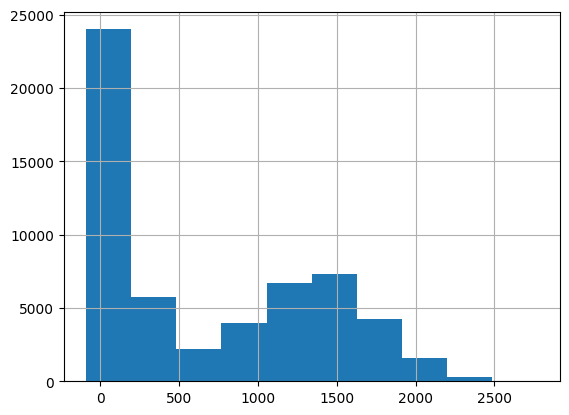

In [66]:
cleaned_df.gps_height.value_counts()
cleaned_df.gps_height.hist()

Most of the wells are at level surfaces which makes sense. No transformation needed

#### Column Analysis - Date Recorded

In [67]:
cleaned_df['year_recorded'] = pd.DatetimeIndex(cleaned_df['date_recorded']).year
cleaned_df['month_recorded'] = pd.DatetimeIndex(cleaned_df['date_recorded']).month_name()
drop_numerical_cols.append('date_recorded')
drop_numerical_cols

['region_code', 'date_recorded']

We extract month and year and remove `date_recorded`. We also need to convert them to categories for eaasy analysis

In [68]:
cleaned_df['year_recorded'].value_counts()

year_recorded
2011    28323
2013    22100
2012     5616
2004       24
2002        1
Name: count, dtype: int64

In [69]:
categories = pd.cut(cleaned_df['year_recorded'], bins=[2000, 2010, 2011, 2012, 2013], labels=["2001-2010", "2011", "2012", "2013"])

In [70]:
cleaned_df['year_recorded_bins'] = categories

In [71]:
cleaned_df.year_recorded_bins.value_counts()

year_recorded_bins
2011         28323
2013         22100
2012          5616
2001-2010       25
Name: count, dtype: int64

In [72]:
drop_numerical_cols.append('year_recorded')

#### Column Analysis - Population

In [73]:
cleaned_df.population.value_counts()

population
0       20398
1        6738
200      1837
150      1795
250      1450
        ...  
1290        1
197         1
2461        1
398         1
912         1
Name: count, Length: 1026, dtype: Int64

Seems okay

#### Column Analysis - Num Private

In [74]:
cleaned_df.groupby('num_private')[['funder']].value_counts()
# cleaned_df.head()

num_private  funder                
0            government of tanzania    8540
             not known                 3463
             danida                    2920
             hesawa                    1986
             world bank                1270
                                       ... 
672          muwsa                        1
698          muwsa                        1
755          government of tanzania       1
1402         muwsa                        1
1776         muwsa                        1
Name: count, Length: 1898, dtype: int64

No relation with other columns and data description missing. For now we'll keep it.

#### Column Analysis - Amount TSH

In [75]:
cleaned_df.amount_tsh.value_counts()

amount_tsh
0.0         38823
500.0        3055
50.0         2213
1000.0       1482
20.0         1457
            ...  
170000.0        1
220.0           1
38000.0         1
12.0            1
60000.0         1
Name: count, Length: 94, dtype: Int64

No modification needed.

## Data Cleaning - Last 20 Features

In [76]:
df = pump_data_val.set_index('id').iloc[:, 19:]

In [77]:
drop_columns_last_20 = []

In [78]:
df.columns

Index(['scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [79]:
# clean all object/text columns. lower and strip

# df_obj = df.select_dtypes(['object'])

def trim_all_columns(df):
    """
    Trim whitespace from ends & lower each value across all series in dataframe
    """
    trim_strings = lambda x: x.lower().strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

In [80]:
df = trim_all_columns(df)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   scheme_management      55522 non-null  object
 1   scheme_name            30590 non-null  object
 2   permit                 56344 non-null  object
 3   construction_year      59400 non-null  int64 
 4   extraction_type        59400 non-null  object
 5   extraction_type_group  59400 non-null  object
 6   extraction_type_class  59400 non-null  object
 7   management             59400 non-null  object
 8   management_group       59400 non-null  object
 9   payment                59400 non-null  object
 10  payment_type           59400 non-null  object
 11  water_quality          59400 non-null  object
 12  quality_group          59400 non-null  object
 13  quantity               59400 non-null  object
 14  quantity_group         59400 non-null  object
 15  source              

In [82]:
col_list_2 = check_cero_var_columns(df)
print(f"Zero Variance columns: {col_list_2}")

Zero Variance columns: []


In [83]:
# check for missing values
df.isna().sum()

scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
dtype: int64

In [84]:
df.head()

,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,
69572,vwc,roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,vwc,nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,vwc,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


#### Year

In [85]:
# more than 30% of construction year is 0, we will probably drop this column
df.construction_year.value_counts()[:10]/df.shape[0]

construction_year
0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
Name: count, dtype: float64

In [86]:
years = df.construction_year.to_list()
min(years), max(years)

(0, 2013)

In [87]:
years = [3000 if i == 0 else i for i in years]
min(years), max(years)

(1960, 3000)

In [88]:
import pandas as pd

bin_edges = [1959, 1975, 1990, 2013, 3001]  # Customize the bin edges
labels = ["1960-1975", "1976-1990", "1991-2013", "Not Known"]  # Customize the labels

# Perform the cut and assign labels
categories = pd.cut(years, bins=bin_edges, labels=labels, retbins=False)

print(categories, '-------')


['1991-2013', '1991-2013', '1991-2013', '1976-1990', 'Not Known', ..., '1991-2013', '1991-2013', 'Not Known', 'Not Known', '1991-2013']
Length: 59400
Categories (4, object): ['1960-1975' < '1976-1990' < '1991-2013' < 'Not Known'] -------


In [89]:
df['year_bins'] = categories

In [90]:
df[['construction_year', 'year_bins']]

,construction_year,year_bins
id,,
69572,1999,1991-2013
8776,2010,1991-2013
34310,2009,1991-2013
67743,1986,1976-1990
19728,0,Not Known
...,...,...
60739,1999,1991-2013
27263,1996,1991-2013
37057,0,Not Known


In [91]:
df.year_bins.value_counts(dropna=False)

year_bins
1991-2013    27215
Not Known    20709
1976-1990     8377
1960-1975     3099
Name: count, dtype: int64

In [92]:
drop_columns_last_20.append('construction_year')

#### Scheme Management

In [93]:
df.loc[:, ['scheme_management', 'scheme_name']].value_counts()

scheme_management  scheme_name  
vwc                k                574
wua                chalinze wate    405
vwc                danida           378
                   m                331
                   borehole         285
                                   ... 
                   upper  ruvu        1
                   upper river        1
                   upper ruvu ba      1
                   islamic            1
                   izunya             1
Name: count, Length: 2946, dtype: int64

In [94]:
# most of scheme_management is null when scheme_name is null.
df.loc[df.loc[:, 'scheme_management'].isna(), ['scheme_management', 'scheme_name']].isna().sum()

scheme_management    3878
scheme_name          3572
dtype: int64

#### Check if we can get scheme_management from scheme_name

In [95]:
scheme = df.loc[~df.loc[:, 'scheme_name'].isna() & df.loc[:, 'scheme_management'].isna(),
       ['scheme_management', 'scheme_name']]

In [96]:
scheme['token'] = scheme.scheme_name.str.split()

In [97]:
df.scheme_management.value_counts(dropna=False)

scheme_management
vwc                 36793
wug                  5206
NaN                  3878
water authority      3153
wua                  2883
water board          2748
parastatal           1680
private operator     1063
company              1061
other                 766
swc                    97
trust                  72
Name: count, dtype: int64

In [98]:
df.loc[df.scheme_management.isnull()==True,['scheme_management', 'management']].value_counts(dropna=False)

scheme_management  management      
NaN                vwc                 2451
                   wug                  633
                   unknown              468
                   other                186
                   private operator     119
                   parastatal            11
                   wua                    6
                   water authority        2
                   company                1
                   trust                  1
Name: count, dtype: int64

All the null values in `scheme_management` have values in `management` column. Therefore, we can remove column - `scheme_management`

In [99]:
drop_columns_last_20.append('scheme_management')
drop_columns_last_20.append('scheme_name')
print(drop_columns_last_20)

['construction_year', 'scheme_management', 'scheme_name']


#### Permit

In [100]:
df.loc[:, 'permit'].value_counts(dropna=False)

permit
True     38852
False    17492
NaN       3056
Name: count, dtype: int64

In [101]:
# change datatype to bool
df['permit'] = df.permit.apply(bool)

In [102]:
df.permit

id
69572    False
8776      True
34310     True
67743     True
19728     True
         ...  
60739     True
27263     True
37057    False
31282     True
26348     True
Name: permit, Length: 59400, dtype: bool

Seems okay

#### Extraction Type

In [103]:
# These columns don't need much cleaninbg. Will be interesting to see how it relates with our labels
df.loc[:, ['extraction_type_class', 'extraction_type_group', 'extraction_type']].value_counts()

extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               nira/tanira            nira/tanira                   8154
other                  other                  other                         6430
submersible            submersible            submersible                   4764
handpump               swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
handpump               india mark ii          india mark ii                 2400
                       afridev                afridev                       1770
submersible            submersible            ksb                           1415
rope pump              rope pump              other - rope pump              451
handpump               other handpump         other - swn 81                 229
wind-powered           wind-powered  

The column `extraction_type`, `extraction_type_class`, `extraction_type_group` seem to have similar information which indicates that we can keep one of these columns. Therefore, we can remove 

In [104]:
drop_columns_last_20.append('extraction_type_class')
drop_columns_last_20.append('extraction_type_group')
print(drop_columns_last_20)

['construction_year', 'scheme_management', 'scheme_name', 'extraction_type_class', 'extraction_type_group']


#### Management

In [105]:
df.loc[:, ['management_group', 'management']].value_counts()

management_group  management      
user-group        vwc                 40507
                  wug                  6515
                  water board          2933
                  wua                  2535
commercial        private operator     1971
parastatal        parastatal           1768
commercial        water authority       904
other             other                 844
commercial        company               685
unknown           unknown               561
other             other - school         99
commercial        trust                  78
Name: count, dtype: int64

`Management` column seems to contain all the information from `management_group` column. We can keep `management`

In [106]:
drop_columns_last_20.append('management_group')
print(drop_columns_last_20)

['construction_year', 'scheme_management', 'scheme_name', 'extraction_type_class', 'extraction_type_group', 'management_group']


#### Payment

In [107]:
# drop payment type
df.loc[:, ['payment', 'payment_type']].value_counts()

payment                payment_type
never pay              never pay       25348
pay per bucket         per bucket       8985
pay monthly            monthly          8300
unknown                unknown          8157
pay when scheme fails  on failure       3914
pay annually           annually         3642
other                  other            1054
Name: count, dtype: int64

`Paymnet_type` column contains all the values from `payment`. So we can remove `payment` column.

In [108]:
drop_columns_last_20.append('payment')
print(drop_columns_last_20)

['construction_year', 'scheme_management', 'scheme_name', 'extraction_type_class', 'extraction_type_group', 'management_group', 'payment']


#### Water 

In [109]:
# largely have the same values apart from flouride (which is a very small number). Drop quality_group
df.loc[:, ['quality_group', 'water_quality']].value_counts()

quality_group  water_quality     
good           soft                  50818
salty          salty                  4856
unknown        unknown                1876
milky          milky                   804
colored        coloured                490
salty          salty abandoned         339
fluoride       fluoride                200
               fluoride abandoned       17
Name: count, dtype: int64

Column `Quality Group` contains all the values from `water_quality`. Therefore, rmove water quality

In [110]:
drop_columns_last_20.append('water_quality')
print(drop_columns_last_20)

['construction_year', 'scheme_management', 'scheme_name', 'extraction_type_class', 'extraction_type_group', 'management_group', 'payment', 'water_quality']


In [111]:
# We can group other categories with less frequency.
df = combine_categories(df, 'quality_group', 1, 'bad-other')

Combined Columns List: ['funder', 'installer', 'wpt_name', 'subvillage', 'region', 'lga', 'ward', 'quality_group']


#### Quantity

In [112]:
# for same reasons above, drop quantity_group
df.loc[:, ['quantity', 'quantity_group']].value_counts()

quantity      quantity_group
enough        enough            33186
insufficient  insufficient      15129
dry           dry                6246
seasonal      seasonal           4050
unknown       unknown             789
Name: count, dtype: int64

In [113]:
drop_columns_last_20.append('quantity_group')
print(drop_columns_last_20)

['construction_year', 'scheme_management', 'scheme_name', 'extraction_type_class', 'extraction_type_group', 'management_group', 'payment', 'water_quality', 'quantity_group']


#### Source

In [114]:
# we can drop source_type, since it's information is covered largely in source and source_class.
df.loc[:, ['source_class', 'source_type', 'source']].value_counts()

source_class  source_type           source              
groundwater   spring                spring                  17021
              shallow well          shallow well            16824
              borehole              machine dbh             11075
surface       river/lake            river                    9612
              rainwater harvesting  rainwater harvesting     2295
groundwater   borehole              hand dtw                  874
surface       river/lake            lake                      765
              dam                   dam                       656
unknown       other                 other                     212
                                    unknown                    66
Name: count, dtype: int64

In [115]:
drop_columns_last_20.append('source_type')
print(drop_columns_last_20)

['construction_year', 'scheme_management', 'scheme_name', 'extraction_type_class', 'extraction_type_group', 'management_group', 'payment', 'water_quality', 'quantity_group', 'source_type']


#### Waterpoint

In [116]:
# exactly the same, drop waterpoint_type_group
df.loc[:, ['waterpoint_type','waterpoint_type_group']].value_counts()

waterpoint_type              waterpoint_type_group
communal standpipe           communal standpipe       28522
hand pump                    hand pump                17488
other                        other                     6380
communal standpipe multiple  communal standpipe        6103
improved spring              improved spring            784
cattle trough                cattle trough              116
dam                          dam                          7
Name: count, dtype: int64

In [117]:
drop_columns_last_20.append('waterpoint_type_group')
print(drop_columns_last_20)

['construction_year', 'scheme_management', 'scheme_name', 'extraction_type_class', 'extraction_type_group', 'management_group', 'payment', 'water_quality', 'quantity_group', 'source_type', 'waterpoint_type_group']


## Drop Columns

In [118]:
# Join both first 20 features and last 20 features
cleaned_df_ = pd.merge(cleaned_df, df, on='id')

In [119]:
remove_columns = combined_cols+drop_numerical_cols+drop_columns_last_20
print(f"Columns to be removed: {remove_columns}")

Columns to be removed: ['funder', 'installer', 'wpt_name', 'subvillage', 'region', 'lga', 'ward', 'quality_group', 'region_code', 'date_recorded', 'year_recorded', 'construction_year', 'scheme_management', 'scheme_name', 'extraction_type_class', 'extraction_type_group', 'management_group', 'payment', 'water_quality', 'quantity_group', 'source_type', 'waterpoint_type_group']


In [120]:
cleaned_df_final = cleaned_df_.drop(remove_columns, axis=1)
cleaned_df_final = pd.merge(cleaned_df_final, pump_data_lab, on='id')
cleaned_df_final = cleaned_df_final.convert_dtypes()
cleaned_df_final = cleaned_df_final.set_index('id')
cleaned_df_final.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,district_code,population,public_meeting,funder_combined,...,extraction_type,management,payment_type,quantity,source,source_class,waterpoint_type,year_bins,quality_group_combined,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,lake nyasa,5,109,True,Other,...,gravity,vwc,annually,enough,spring,groundwater,communal standpipe,1991-2013,good,functional
34310,25.0,686,37.460664,-3.821329,0,pangani,4,250,True,Other,...,gravity,vwc,per bucket,enough,dam,surface,communal standpipe multiple,1991-2013,good,functional
67743,0.0,263,38.486161,-11.155298,0,ruvuma / southern coast,63,58,True,unicef,...,submersible,vwc,never pay,dry,machine dbh,groundwater,communal standpipe multiple,1976-1990,good,non functional
19728,0.0,0,31.130847,-1.825359,0,lake victoria,1,0,True,Other,...,gravity,other,never pay,seasonal,rainwater harvesting,surface,communal standpipe,Not Known,good,functional
9944,20.0,0,39.172796,-4.765587,0,pangani,8,1,True,Other,...,submersible,vwc,per bucket,enough,other,unknown,communal standpipe multiple,1991-2013,salty,functional


In [121]:
cleaned_df_final.to_csv(f'{ROOT_PATH}/data/processed/cleaned.csv')

## Read file to confirm

In [6]:
# Test reading file
test_df = pd.read_csv(f'{ROOT_PATH}/data/processed/cleaned.csv', index_col=0)
test_df.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,district_code,population,public_meeting,funder_combined,...,extraction_type,management,payment_type,quantity,source,source_class,waterpoint_type,year_bins,quality_group_combined,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,lake nyasa,5,109,True,Other,...,gravity,vwc,annually,enough,spring,groundwater,communal standpipe,1991-2013,good,functional
34310,25.0,686,37.460664,-3.821329,0,pangani,4,250,True,Other,...,gravity,vwc,per bucket,enough,dam,surface,communal standpipe multiple,1991-2013,good,functional
67743,0.0,263,38.486161,-11.155298,0,ruvuma / southern coast,63,58,True,unicef,...,submersible,vwc,never pay,dry,machine dbh,groundwater,communal standpipe multiple,1976-1990,good,non functional
19728,0.0,0,31.130847,-1.825359,0,lake victoria,1,0,True,Other,...,gravity,other,never pay,seasonal,rainwater harvesting,surface,communal standpipe,Not Known,good,functional
9944,20.0,0,39.172796,-4.765587,0,pangani,8,1,True,Other,...,submersible,vwc,per bucket,enough,other,unknown,communal standpipe multiple,1991-2013,salty,functional


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56064 entries, 69572 to 26348
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   amount_tsh              56064 non-null  float64
 1   gps_height              56064 non-null  int64  
 2   longitude               56064 non-null  float64
 3   latitude                56064 non-null  float64
 4   num_private             56064 non-null  int64  
 5   basin                   56064 non-null  object 
 6   district_code           56064 non-null  int64  
 7   population              56064 non-null  int64  
 8   public_meeting          56064 non-null  bool   
 9   funder_combined         56064 non-null  object 
 10  installer_combined      56064 non-null  object 
 11  wpt_name_combined       56064 non-null  object 
 12  subvillage_combined     56064 non-null  object 
 13  region_combined         56064 non-null  object 
 14  lga_combined            56064 non-null 

In [8]:
test_df.isna().sum()

amount_tsh                0
gps_height                0
longitude                 0
latitude                  0
num_private               0
basin                     0
district_code             0
population                0
public_meeting            0
funder_combined           0
installer_combined        0
wpt_name_combined         0
subvillage_combined       0
region_combined           0
lga_combined              0
ward_combined             0
month_recorded            0
year_recorded_bins        0
permit                    0
extraction_type           0
management                0
payment_type              0
quantity                  0
source                    0
source_class              0
waterpoint_type           0
year_bins                 0
quality_group_combined    0
status_group              0
dtype: int64

In [9]:
test_df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population
count,56064.000000,56064.000000,56064.000000,5.606400e+04,56064.000000,56064.000000,56064.000000
mean,332.068004,668.949308,34.235460,-5.751405e+00,0.493686,5.679955,178.930722
std,3068.785673,695.178479,6.155716,2.889370e+00,12.567608,9.700604,476.284155
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.096949,-8.560007e+00,0.000000,2.000000,0.000000
50%,0.000000,365.000000,34.973790,-5.069285e+00,0.000000,3.000000,20.000000
75%,25.000000,1321.000000,37.194164,-3.345594e+00,0.000000,5.000000,210.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,80.000000,30500.000000
